In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [2]:
import os
def filelist(dirname):
    f_list = []
    try:
        filenames = os.listdir(dirname)
        for filename in filenames:
            name = os.path.join(dirname, filename)
            f_list.append(name)
    except:
        print("none")
    return f_list


In [3]:
files = filelist('../Data/Feature_Final/Location_filled/')

In [4]:
files.sort()

In [5]:
loc_all = pd.DataFrame()
for loc in files:
    print(loc)
    
    tmp = pd.read_csv(loc)
    loc_all = pd.concat([loc_all, tmp], axis=0)

../Data/Feature_Final/Location_filled/22955826_filled.csv
../Data/Feature_Final/Location_filled/24897713_filled.csv
../Data/Feature_Final/Location_filled/25063234_filled.csv
../Data/Feature_Final/Location_filled/25464368_filled.csv
../Data/Feature_Final/Location_filled/27502754_filled.csv
../Data/Feature_Final/Location_filled/27840617_filled.csv
../Data/Feature_Final/Location_filled/27965866_filled.csv
../Data/Feature_Final/Location_filled/28878128_filled.csv
../Data/Feature_Final/Location_filled/29962358_filled.csv
../Data/Feature_Final/Location_filled/38781420_filled.csv
../Data/Feature_Final/Location_filled/39203876_filled.csv
../Data/Feature_Final/Location_filled/39390847_filled.csv
../Data/Feature_Final/Location_filled/40325607_filled.csv
../Data/Feature_Final/Location_filled/40523189_filled.csv
../Data/Feature_Final/Location_filled/41651454_filled.csv
../Data/Feature_Final/Location_filled/41860680_filled.csv
../Data/Feature_Final/Location_filled/41884980_filled.csv
../Data/Featur

In [5]:
# loc_all.to_csv('../Data/Feature_Final/Location_filled/Loc_filled_all.csv')


In [6]:
loc_all = pd.read_csv('../Data/Feature_Final/Location_filled/Loc_filled_all.csv')

In [3]:
df_all = pd.read_csv('../Data/0115_SWB_Final.csv')

In [4]:
tmp = loc_all.groupby(['uid', 'cluster_id']).count()
tmp.tail(30)

Unnamed: 0  Unnamed: 0.1   latitude   longitude  \
uid        cluster_id                                                    
93775784.0 1.0               8467          8467       8467        8467   
           6.0                212           212        212         212   
           9.0                768           768        768         768   
           10.0            133062        133062     133062      133062   
94766746.0 0.0              18384         18384      18384       18384   
           1.0               7495          7495       7495        7495   
           6.0               2339          2339       2339        2339   
           9.0                366           366        366         366   
           10.0            143654        143654     143654      143654   
94852564.0 0.0              23308         23308      23308       23308   
           1.0               2716          2716       2716        2716   
           9.0                252           252        252         252   
           10.0            130630        130630     130630      130630   
95820905.0 0.0                170           170        170         170   
           1.0               6496          6496       6496        6496   
           2.0                406           406        406         406   
           4.0               1743          1743       1743        1743   
           6.0              32848         32848      32848       32848   
           9.0               1050          1050       1050        1050   
           10.0            124003        124003     124003      124003   
95983626.0 1.0               6640          6640       6640        6640   
           8.0               7671          7671       7671        7671   
           9.0               8044          8044       8044        8044   
           10.0            137932        137932     137932      137932   
97803125.0 1.0               3250          3250       3250        3250   
           2.0               4012          4012       4012        4012   
           4.0              17011         17011      17011       17011   
           8.0               1139          1139       1139        1139   
           9.0                219           219        219         219   
           10.0            135782        135782     135782      135782   

                       timestamp  
uid        cluster_id             
93775784.0 1.0              8467  
           6.0               212  
           9.0               768  
           10.0           133062  
94766746.0 0.0             18384  
           1.0              7495  
           6.0              2339  
           9.0               366  
           10.0           143654  
94852564.0 0.0             23308  
           1.0              2716  
           9.0               252  
           10.0           130630  
95820905.0 0.0               170  
           1.0              6496  
           2.0               406  
           4.0              1743  
           6.0             32848  
           9.0              1050  
           10.0           124003  
95983626.0 1.0              6640  
           8.0              7671  
           9.0              8044  
           10.0           137932  
97803125.0 1.0              3250  
           2.0              4012  
           4.0             17011  
           8.0              1139  
           9.0               219  
           10.0           135782

In [34]:
print(df_all['SWB_score'].mean())
SWB_mean = df_all.groupby('uid')['SWB_score'].mean().reset_index()
SWB_mean.head()
SWB_mean[SWB_mean['SWB_score'] < df_all['SWB_score'].mean()]

21.18436460412322


,uid,SWB_score
0,20946596,17.107143
2,22682373,13.901786
7,25464368,15.831633
8,27502754,13.755102
9,27840617,6.596939
11,28878128,6.724490
12,29962358,16.311224
13,30737266,20.081633
16,38781420,11.265306
17,39203876,9.953125


In [35]:
SWB_mean[SWB_mean['uid'] == 94852564.0]

,uid,SWB_score
74,94852564,19.006098


In [13]:
loc_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12461807 entries, 0 to 161412
Data columns (total 6 columns):
Unnamed: 0    object
uid           float64
 latitude     float64
 longitude    float64
timestamp     object
cluster_id    float64
dtypes: float64(4), object(2)
memory usage: 665.5+ MB


In [18]:
set(loc_all['uid'])

{22955826.0,
 24897713.0,
 25063234.0,
 25464368.0,
 27502754.0,
 27840617.0,
 27965866.0,
 28878128.0,
 29962358.0,
 38781420.0,
 39203876.0,
 39390847.0,
 40325607.0,
 40523189.0,
 41651454.0,
 41860680.0,
 41884980.0,
 42236646.0,
 43261317.0,
 43578831.0,
 45473021.0,
 46029500.0,
 47043065.0,
 48152807.0,
 49179064.0,
 50116575.0,
 50636732.0,
 50679144.0,
 51075903.0,
 51218616.0,
 51504685.0,
 52069902.0,
 52219914.0,
 52565188.0,
 53789312.0,
 53999376.0,
 54553998.0,
 54613079.0,
 55760914.0,
 57623951.0,
 57670750.0,
 58201289.0,
 63555770.0,
 63987688.0,
 64912412.0,
 65044529.0,
 66080208.0,
 66124688.0,
 67973507.0,
 71264204.0,
 75197570.0,
 75268901.0,
 75939877.0,
 76121285.0,
 76167811.0,
 76316612.0,
 76674752.0,
 76727067.0,
 76783139.0,
 86202124.0,
 87155919.0,
 87809201.0,
 88096582.0,
 89215319.0,
 89242282.0,
 89594101.0,
 89751274.0,
 90461852.0,
 92369558.0,
 93542520.0,
 93733764.0,
 93775784.0,
 94766746.0,
 94852564.0,
 95820905.0,
 95983626.0,
 97803125.0}

# Loc cluster 특징

## cluster 10 : 카이스트

In [45]:
loc_all[loc_all['cluster_id'] == 10].head()

,Unnamed: 0,uid,latitude,longitude,timestamp,cluster_id
0,2017-09-10 00:01:27,22955826.0,36.373593,127.35665,2017-09-10 00:01:27,10.0
1,2017-09-10 00:02:27,22955826.0,36.373593,127.35665,2017-09-10 00:02:27,10.0
2,2017-09-10 00:03:27,22955826.0,36.373593,127.35665,2017-09-10 00:03:27,10.0
3,2017-09-10 00:04:27,22955826.0,36.373593,127.35665,2017-09-10 00:04:27,10.0
4,2017-09-10 00:05:27,22955826.0,36.373593,127.35665,2017-09-10 00:05:27,10.0


## cluster 9 : 카이스트 문지 캠퍼스

In [50]:
loc_all[loc_all['cluster_id'] == 9].iloc[:, :80]

,Unnamed: 0,uid,latitude,longitude,timestamp,cluster_id
16012,2017-09-19 21:34:53,22955826.0,36.390850,127.398337,2017-09-19 21:34:53,9.0
16013,2017-09-19 21:35:53,22955826.0,36.390850,127.398337,2017-09-19 21:35:53,9.0
16014,2017-09-19 21:36:53,22955826.0,36.390850,127.398337,2017-09-19 21:36:53,9.0
16015,2017-09-19 21:37:53,22955826.0,36.390850,127.398337,2017-09-19 21:37:53,9.0
16016,2017-09-19 21:38:53,22955826.0,36.390850,127.398337,2017-09-19 21:38:53,9.0
16017,2017-09-19 21:39:53,22955826.0,36.390850,127.398337,2017-09-19 21:39:53,9.0
16018,2017-09-19 21:40:16,22955826.0,36.390849,127.398340,2017-09-19 21:40:16,9.0
16019,2017-09-19 21:41:16,22955826.0,36.390849,127.398340,2017-09-19 21:41:16,9.0
16020,2017-09-19 21:42:16,22955826.0,36.390849,127.398340,2017-09-19 21:42:16,9.0
16021,2017-09-19 21:43:16,22955826.0,36.390849,127.398340,2017-09-19 21:43:16,9.0


## cluster 8 : 남쪽 지방..진주..함안..

In [51]:
loc_all[loc_all['cluster_id'] == 8].iloc[:, :80]

,Unnamed: 0,uid,latitude,longitude,timestamp,cluster_id
12229,2017-09-16 21:22:19,24897713.0,35.172556,128.058682,2017-09-16 21:22:19,8.0
12230,2017-09-16 21:23:19,24897713.0,35.172556,128.058682,2017-09-16 21:23:19,8.0
12231,2017-09-16 21:24:19,24897713.0,35.172556,128.058682,2017-09-16 21:24:19,8.0
12232,2017-09-16 21:24:20,24897713.0,35.172556,128.058682,2017-09-16 21:24:20,8.0
12233,2017-09-16 21:25:20,24897713.0,35.172556,128.058682,2017-09-16 21:25:20,8.0
12234,2017-09-16 21:25:35,24897713.0,35.172556,128.058682,2017-09-16 21:25:35,8.0
12235,2017-09-16 21:26:35,24897713.0,35.172556,128.058682,2017-09-16 21:26:35,8.0
12236,2017-09-16 21:27:35,24897713.0,35.172556,128.058682,2017-09-16 21:27:35,8.0
12237,2017-09-16 21:27:49,24897713.0,35.172556,128.058682,2017-09-16 21:27:49,8.0
12238,2017-09-16 21:28:49,24897713.0,35.172556,128.058682,2017-09-16 21:28:49,8.0


## cluster 7 : 강원도

In [52]:
loc_all[loc_all['cluster_id'] == 7].iloc[:, :80]

,Unnamed: 0,uid,latitude,longitude,timestamp,cluster_id
90605,2017-11-04 21:29:41,27840617.0,37.751458,128.878529,2017-11-04 21:29:41,7.0
90606,2017-11-04 21:30:41,27840617.0,37.751458,128.878529,2017-11-04 21:30:41,7.0
90607,2017-11-04 21:31:41,27840617.0,37.751458,128.878529,2017-11-04 21:31:41,7.0
90608,2017-11-04 21:32:41,27840617.0,37.751458,128.878529,2017-11-04 21:32:41,7.0
90609,2017-11-04 21:33:41,27840617.0,37.751458,128.878529,2017-11-04 21:33:41,7.0
90610,2017-11-04 21:34:41,27840617.0,37.751458,128.878529,2017-11-04 21:34:41,7.0
90611,2017-11-04 21:35:41,27840617.0,37.751458,128.878529,2017-11-04 21:35:41,7.0
90612,2017-11-04 21:36:41,27840617.0,37.751458,128.878529,2017-11-04 21:36:41,7.0
90613,2017-11-04 21:37:41,27840617.0,37.751458,128.878529,2017-11-04 21:37:41,7.0
90614,2017-11-04 21:38:41,27840617.0,37.751458,128.878529,2017-11-04 21:38:41,7.0


## cluster 6 : 경기도

In [53]:
loc_all[loc_all['cluster_id'] == 6].iloc[:, :80]

,Unnamed: 0,uid,latitude,longitude,timestamp,cluster_id
74547,2017-10-27 16:48:42,22955826.0,37.076734,127.130051,2017-10-27 16:48:42,6.0
74548,2017-10-27 16:49:42,22955826.0,37.076734,127.130051,2017-10-27 16:49:42,6.0
74549,2017-10-27 16:50:42,22955826.0,37.076734,127.130051,2017-10-27 16:50:42,6.0
74550,2017-10-27 16:51:42,22955826.0,37.076734,127.130051,2017-10-27 16:51:42,6.0
74551,2017-10-27 16:52:42,22955826.0,37.076734,127.130051,2017-10-27 16:52:42,6.0
74552,2017-10-27 16:53:42,22955826.0,37.076734,127.130051,2017-10-27 16:53:42,6.0
74553,2017-10-27 16:54:42,22955826.0,37.076734,127.130051,2017-10-27 16:54:42,6.0
74554,2017-10-27 16:55:42,22955826.0,37.076734,127.130051,2017-10-27 16:55:42,6.0
74555,2017-10-27 16:56:42,22955826.0,37.076734,127.130051,2017-10-27 16:56:42,6.0
74556,2017-10-27 16:57:42,22955826.0,37.076734,127.130051,2017-10-27 16:57:42,6.0


## cluster 5 : 남쪽..진도..제주도


In [61]:
loc_all[loc_all['cluster_id'] == 5].iloc[80:90, :]

,Unnamed: 0,uid,latitude,longitude,timestamp,cluster_id
16781,2017-10-01 05:47:19,25063234.0,34.374690,126.134649,2017-10-01 05:47:19,5.0
16782,2017-10-01 05:48:19,25063234.0,34.374690,126.134649,2017-10-01 05:48:19,5.0
16783,2017-10-01 05:49:19,25063234.0,34.374690,126.134649,2017-10-01 05:49:19,5.0
16784,2017-10-01 05:49:21,25063234.0,34.370111,126.136718,2017-10-01 05:49:21,5.0
16785,2017-10-01 05:50:21,25063234.0,34.370111,126.136718,2017-10-01 05:50:21,5.0
16786,2017-10-01 05:50:41,25063234.0,34.370111,126.136718,2017-10-01 05:50:41,5.0
16787,2017-10-01 05:51:41,25063234.0,34.370111,126.136718,2017-10-01 05:51:41,5.0
16788,2017-10-01 05:52:41,25063234.0,34.370111,126.136718,2017-10-01 05:52:41,5.0
16789,2017-10-01 05:53:26,25063234.0,34.370111,126.136718,2017-10-01 05:53:26,5.0
16790,2017-10-01 05:54:26,25063234.0,34.370111,126.136718,2017-10-01 05:54:26,5.0


## cluster 0 : 서울

In [63]:
loc_all[loc_all['cluster_id'] == 0].iloc[10:20, :]

,Unnamed: 0,uid,latitude,longitude,timestamp,cluster_id
74624,2017-10-27 18:02:10,22955826.0,37.50313,127.004252,2017-10-27 18:02:10,0.0
74625,2017-10-27 18:03:10,22955826.0,37.50313,127.004252,2017-10-27 18:03:10,0.0
74626,2017-10-27 18:04:10,22955826.0,37.50313,127.004252,2017-10-27 18:04:10,0.0
74627,2017-10-27 18:05:10,22955826.0,37.50313,127.004252,2017-10-27 18:05:10,0.0
74628,2017-10-27 18:06:10,22955826.0,37.50313,127.004252,2017-10-27 18:06:10,0.0
74629,2017-10-27 18:07:10,22955826.0,37.50313,127.004252,2017-10-27 18:07:10,0.0
74630,2017-10-27 18:08:10,22955826.0,37.50313,127.004252,2017-10-27 18:08:10,0.0
74631,2017-10-27 18:09:10,22955826.0,37.50313,127.004252,2017-10-27 18:09:10,0.0
74632,2017-10-27 18:10:10,22955826.0,37.50313,127.004252,2017-10-27 18:10:10,0.0
74633,2017-10-27 18:11:10,22955826.0,37.50313,127.004252,2017-10-27 18:11:10,0.0


## cluster 1 : 대전

In [66]:
loc_all[loc_all['cluster_id'] == 1].iloc[-10:, :]

,Unnamed: 0,uid,latitude,longitude,timestamp,cluster_id
160501,2017-12-17 10:36:05,97803125.0,36.350167,127.437633,2017-12-17 10:36:05,1.0
160502,2017-12-17 10:37:05,97803125.0,36.350167,127.437633,2017-12-17 10:37:05,1.0
160503,2017-12-17 10:38:05,97803125.0,36.350167,127.437633,2017-12-17 10:38:05,1.0
160504,2017-12-17 10:39:05,97803125.0,36.350167,127.437633,2017-12-17 10:39:05,1.0
160505,2017-12-17 10:40:05,97803125.0,36.350167,127.437633,2017-12-17 10:40:05,1.0
160506,2017-12-17 10:41:05,97803125.0,36.350167,127.437633,2017-12-17 10:41:05,1.0
160507,2017-12-17 10:42:05,97803125.0,36.350167,127.437633,2017-12-17 10:42:05,1.0
160508,2017-12-17 10:43:05,97803125.0,36.350167,127.437633,2017-12-17 10:43:05,1.0
160509,2017-12-17 10:44:05,97803125.0,36.350167,127.437633,2017-12-17 10:44:05,1.0
160510,2017-12-17 10:45:05,97803125.0,36.350167,127.437633,2017-12-17 10:45:05,1.0


## cluster 3 : 영동?

In [7]:
loc_all[loc_all['cluster_id'] == 3].iloc[10:20, :]

,Unnamed: 0,Unnamed: 0.1,uid,latitude,longitude,timestamp,cluster_id
521941,38867,2017-10-03 12:37:28,25464368.0,35.161267,126.879613,2017-10-03 12:37:28,3.0
521942,38868,2017-10-03 12:38:28,25464368.0,35.161267,126.879613,2017-10-03 12:38:28,3.0
521943,38869,2017-10-03 12:39:28,25464368.0,35.161267,126.879613,2017-10-03 12:39:28,3.0
521944,38870,2017-10-03 12:40:28,25464368.0,35.161267,126.879613,2017-10-03 12:40:28,3.0
521945,38871,2017-10-03 12:41:28,25464368.0,35.161267,126.879613,2017-10-03 12:41:28,3.0
521946,38872,2017-10-03 12:42:28,25464368.0,35.161267,126.879613,2017-10-03 12:42:28,3.0
521947,38873,2017-10-03 12:43:28,25464368.0,35.161267,126.879613,2017-10-03 12:43:28,3.0
521948,38874,2017-10-03 12:44:28,25464368.0,35.161267,126.879613,2017-10-03 12:44:28,3.0
521949,38875,2017-10-03 12:45:28,25464368.0,35.161267,126.879613,2017-10-03 12:45:28,3.0
521950,38876,2017-10-03 12:46:28,25464368.0,35.161267,126.879613,2017-10-03 12:46:28,3.0


# Sample

In [15]:
unique = loc_all.groupby('uid')['cluster_id'].unique().reset_index()
unique.head()

,uid,cluster_id
0,22955826.0,"[10.0, 1.0, 9.0, 6.0, 0.0]"
1,24897713.0,"[10.0, 1.0, 9.0, 4.0, 8.0, 2.0, 6.0, 0.0]"
2,25063234.0,"[10.0, 9.0, 1.0, 0.0, 8.0, 5.0, 6.0]"
3,25464368.0,"[10.0, 1.0, 9.0, 3.0, 8.0]"
4,27502754.0,"[6.0, 1.0, 10.0, 9.0, 0.0, 2.0, 4.0]"


In [58]:

# unique['cluster_id']= unique['cluster_id'].sort_values()
unique['count'] = unique['cluster_id'].apply(lambda x : len(x))

In [84]:
def getSWB(x):
    score = SWB_mean[SWB_mean['uid'] == x]['SWB_score'].values
    if len(score)>0:
        return score[0]
unique['SWB_score'] = unique['uid'].apply(lambda x : getSWB(x))

In [85]:
unique.to_csv('tmp.csv')

In [25]:

sample_low1 = loc_all[loc_all['uid'] == 27840617.0] # mean = 6.596939
sample_low2 = loc_all[loc_all['uid'] == 93733764.0] # mean = 8.448980

sample_high1 = loc_all[loc_all['uid'] == 50636732.0] # 35.09
sample_high2 = loc_all[loc_all['uid'] == 90461852.0] # 33.80

In [103]:
SWB_mean[SWB_mean['SWB_score'] >20]

,uid,SWB_score
1,22536401,29.122449
3,22785668,29.107143
4,22955826,27.637755
5,24897713,21.586735
6,25063234,27.729708
10,27965866,27.326531
13,30737266,20.081633
14,32646509,23.586735
15,34339234,28.530612
18,39390847,20.612245


In [64]:
SWB_mean[SWB_mean['uid'] == 93775784.0 ]

,uid,SWB_score
72,93775784,15.693878


In [71]:
SWB_mean[SWB_mean['uid'] == 49179064.0 ]

,uid,SWB_score
31,49179064,21.171266


In [92]:
sample = loc_all[loc_all['uid'] == 49179064.0] 


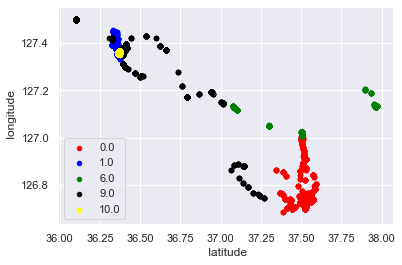

In [99]:
fig, ax = plt.subplots()

colors = {0.0:'red', 1.0:'blue', 6.0:'green',9.0:'black', 10.0:'yellow'}

grouped = sample.groupby('cluster_id')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x=' latitude', y=' longitude', label=key,  color=colors[key])

plt.title('GMM clustering - '+ str(uid) +
              ' (mean SWB : '+str(swb)+')') # mean SWB : 9

plt.show()
# sample.plot(ax=ax, kind='scatter', x=' latitude', y=' longitude', label='cluster_id', color=colors[key])

plt.show()

In [132]:
plt.rcParams["figure.figsize"] = (6,6)

#df = loc_all
def drawLoc(df, uid):
    sample = df[df['uid'] == uid] 
    swb = SWB_mean[SWB_mean['uid'] == uid]['SWB_score'].values[0]
    fig, ax = plt.subplots()

    colors = {0.0:'red', 1.0:'blue', 2.0 : 'yellow', 3.0 : 'magenta', 
              4.0: 'lightpink', 5.0: 'green',  6.0: 'olive',
              7.0:'seagreen', 8.0:'darksalmon', 
              9.0:'purple', 10.0:'black'}

    grouped = sample.groupby('cluster_id')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter',
                   x=' latitude', y=' longitude', 
                   label=key,  color=colors[key], 
                   s=100)
    plt.ylim(126.5,127.8)
    plt.xlim(35.7, 38)
    plt.title('GMM clustering - '+ str(uid) +
                  ' (mean SWB : '+str(swb)+')') # mean SWB : 9

    plt.show()

    # axes[0,0].set_ylim(126.5,127.6)
    # axes[1,0].set_xlim(0,)

    # sns.plt.ylim(126.5,127.8)
    # sns.

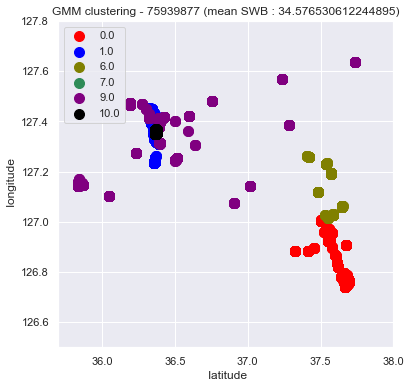

In [138]:
drawLoc(loc_all,75939877)

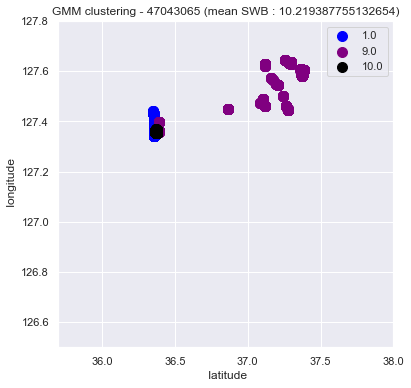

In [136]:
drawLoc(loc_all,47043065)

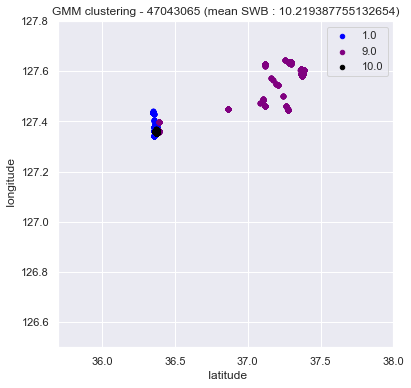

In [123]:
drawLoc(loc_all,47043065)

Text(0.5, 1, 'GMM clustering - High SWB')

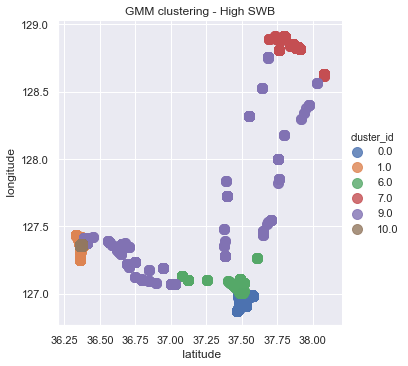

In [121]:
sns.lmplot(' latitude', ' longitude', data = sample_high1, fit_reg = False, 
           scatter_kws={'s':100}, hue='cluster_id')
plt.title('GMM clustering - High SWB')

Text(0.5, 1, 'GMM clustering - Hihgh SWB')

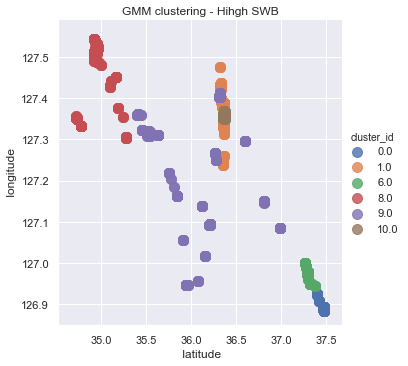

In [120]:
sns.lmplot(' latitude', ' longitude', data = sample_high2, fit_reg = False, 
           scatter_kws={'s':100}, hue='cluster_id')
plt.title('GMM clustering - Hihgh SWB')

# High